# 1 - Perkenalan

TUGAS ASSIGN 3

FINZA YANUAR

PYTN090ONL002 Finza

Dataset : Insurance.csv

# 2 - Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
from numpy import percentile
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# 3 - Data Loading

In [ ]:
# Load Dataset

df_origin = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/insurance.csv')
df_origin

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Duplicate Dataset

df = df_origin.copy()

In [ ]:
# Check Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Check Dataset 2

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We want to check if there are missing values in our dataset.

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Next, we want to see if there are duplicate entries in our data

In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Here, we can see that we have 1 duplicated data, so we have to drop this duplicated data.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

# 4 - Exploratory Data Analysis (EDA)

In this section, we will explore the data we have so we can get better understanding about the data.

First, we want to know how many insurance participants is overweight. Here we have the data for each overweight class:
- overweight class 1 : 30 ≤ BMI < 35
- overweight class 2 : 35 ≤ BMI < 40
- overweight class 3 : BMI ≥ 40



Overweight class 1

In [ ]:
ow_1=df[(df['bmi']>=30)&(df['bmi']<35)]['charges'].count()
ow_2=df[(df['bmi']>=35)&(df['bmi']<40)]['charges'].count()
ow_3=df[df['bmi']>=40]['charges'].count()
tot_ow=ow_1+ow_2+ow_3
tot_all=df['charges'].count

print('Overweight class 1 total : ', ow_1)
print('Overweight class 2 total : ', ow_2)
print('Overweight class 3 total : ', ow_3)
print('Total overweighted participants : ',tot_ow)

Overweight class 1 total :  390
Overweight class 2 total :  225
Overweight class 3 total :  91
Total overweighted participants :  706


Here, we can see the number of overweighted insurance participants for each class. For overweight class 1 consist of 390 people, overweight class 2 consists of 225 people, and overweight class 3 consists of 91 people. Total for all overweighted participants is 706 people. 

Next, we want to find out if there are correlation between bmi, smoker, and charges columns. We can do that by calculating the correlation for each column and plotting in heatmap diagram. We will calculate the correlation using phik method since it can calculate for any type of values in the dataset (both categorical and numerical corellation).

In [ ]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [ ]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['age', 'bmi', 'children', 'charges']


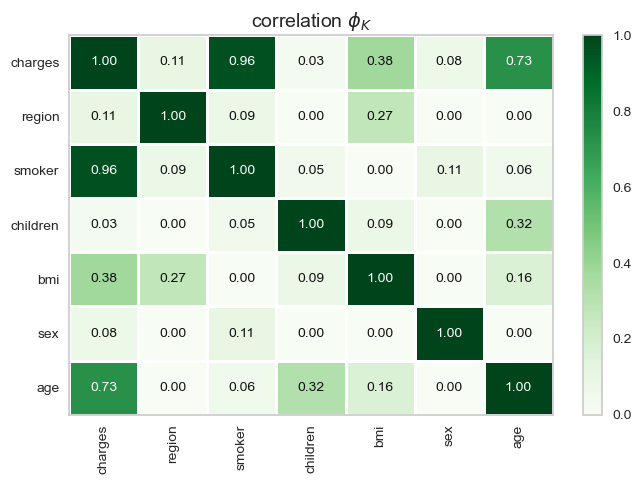

In [ ]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$" 
                        )
plt.show()

Here, we can see each correlation for each column. We can see that the charges column has high correlation with age, smoker, and bmi column. So, we know that these columns are important for this model. We can also see the correlation between bmi and smoker is quite low (0.22). This means the two columns has correlation but only little.

In [ ]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


Next, we want to see the data distribution of bmi column.

c:\Users\blob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.28391419385321137

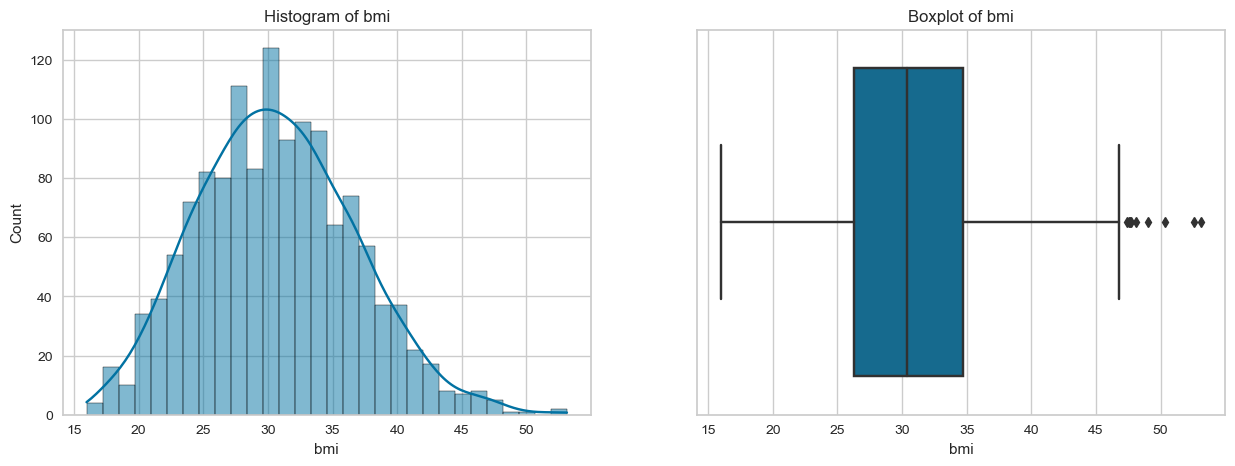

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['bmi'], bins=30,kde=True)
plt.title('Histogram of bmi')

plt.subplot(1,2,2)
sns.boxplot(df['bmi'])
plt.title('Boxplot of bmi');

df['bmi'].skew()

We can see that bmi columns data is normally distributed with skewness of 0.28. There are outliers in this columns that we will handle later in the preprocessing section. 

Next, we want to check the data distribution of age column.

c:\Users\blob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.054780773126998195

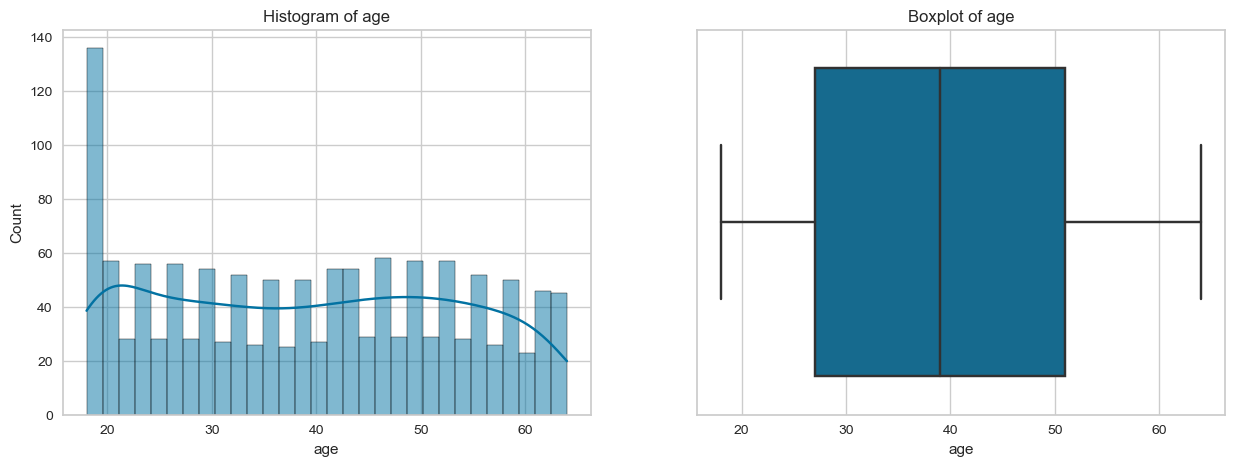

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['age'], bins=30,kde=True)
plt.title('Histogram of age')

plt.subplot(1,2,2)
sns.boxplot(df['age'])
plt.title('Boxplot of age');

df['age'].skew()

We can see the age distribution data is normal without outliers in the data.

# 5 - Data Preprocessing

In this section, we will prepare the data for model training, that are feature selection, data splitting, and data transforming.

## Feature Selection

Since the column that has high correlation with charges are only smoker, bmi, and age, we will use only these column for creating the model.

Now we set the data for model training and model testing in a new variable.

In [ ]:
# Setting data for model training and model testing

data_train_test = df[['smoker','bmi','age','charges']]
data_train_test

,smoker,bmi,age,charges
0,yes,27.900,19,16884.92400
1,no,33.770,18,1725.55230
2,no,33.000,28,4449.46200
3,no,22.705,33,21984.47061
4,no,28.880,32,3866.85520
...,...,...,...,...
1333,no,30.970,50,10600.54830
1334,no,31.920,18,2205.98080
1335,no,36.850,18,1629.83350
1336,no,25.800,21,2007.94500


## Splitting Dataset

Now, we split the data into X and y with X as feature table and y as target.

In [ ]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('charges', axis=1)
y = data_train_test['charges']
X

,smoker,bmi,age
0,yes,27.900,19
1,no,33.770,18
2,no,33.000,28
3,no,22.705,33
4,no,28.880,32
...,...,...,...
1333,no,30.970,50
1334,no,31.920,18
1335,no,36.850,18
1336,no,25.800,21


Next, we want to split each X and y data into train and test data. We set the train data 80% from data total so we have enough data for model training.

In [ ]:
# Split between Train-Set and Test-Set

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (1069, 3)
Test Size  :  (268, 3)


Now that we have split the data into x_train, x_test, y_train, and y_test, we can proceed to the next section, handling outlier.

## Handling Outlier

In the EDA we saw that the bmi column has some outliers so we will handle them here.

In [ ]:
## Calculate quartiles
quartiles = percentile(X_train['bmi'], [25, 50, 75])
## Calculate min/max
fav_min, fav_max = X_train['bmi'].min(), X_train['bmi'].max()

q1 = quartiles[0]
q2 = quartiles[1] # median
q3 = quartiles[2]

## Print 5-number summary
print('Min: %.3f' % fav_min)
print('Q1: %.3f' % q1)
print('Median: %.3f' % q2)
print('Q3: %.3f' % q3)
print('Max: %.3f' % fav_max)

Min: 15.960
Q1: 26.315
Median: 30.400
Q3: 34.700
Max: 53.130


In [ ]:
# IQR = Q3 - Q1
iqr = q3 - q1

# Upper boundaries = Q3 + 3*IQR         
up_bound = q3 + 1.5*iqr               # skewness = 0.83, use 1.5 as IQR factor for boundary

# Lower boundaries = Q1 - 3*IQR
lo_bound = q1 - 1.5*iqr

print('IQR = ', iqr)
print('Upper Boundary = ', up_bound)
print('Lower Boundary = ', lo_bound)

IQR =  8.385000000000002
Upper Boundary =  47.2775
Lower Boundary =  13.737499999999999


Now that we get the boundary value, we will find our outliers.

In [ ]:
bmi_uoutliers = X_train[(X_train['bmi'] > 47.2775)]
bmi_uoutliers

,smoker,bmi,age
1047,yes,52.58,22
401,no,47.52,47
1317,no,53.13,18
543,yes,47.41,54
116,no,49.06,58
286,no,48.07,46
1088,no,47.74,52
860,yes,47.60,37
847,no,50.38,23


In [ ]:
bmi_loutliers = X_train[(X_train['bmi'] < 13.73749)]
bmi_loutliers

,smoker,bmi,age


There are only outliers outside the upper boundary. Next, we will get the index value for the outliers. 

In [ ]:
bmi_outliers_index=bmi_uoutliers.index
bmi_outliers_index

Int64Index([1047, 401, 1317, 543, 116, 286, 1088, 860, 847], dtype='int64')

Dropping the outliers by index value that we get before.

In [ ]:
# Dropping outliers from x train variable

X_train.drop(index=bmi_outliers_index,inplace=True)

Checking if the outliers already dropped.

In [ ]:
X_train[(X_train['bmi'] > 47.2775)]

,smoker,bmi,age


Dropping the same index value inside the y train variable so we get the same length of data.

In [ ]:
y_train.drop(index=bmi_outliers_index,inplace=True)

In [ ]:
print('X_train length:',len(X_train))
print('y_train length:',len(y_train))

X_train length: 1060
y_train length: 1060


Now that we have cleaned our train data we can continue to the next section encoding and scaling.

## Split between Numerical Columns and Categorical Columns

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['bmi', 'age']
Categorical Columns :  ['smoker']


Next, we split the train and test data based on column types.

In [ ]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

Now that we have split the train-test data based on column type, we can continue to the next section, Feature Scaling and Encoding.

## Feature Scaling

First, we want to see the x train data with numerical columns.

In [ ]:
# Display X_train_num

X_train_num

,bmi,age
55,36.955,58
444,26.695,56
852,35.530,46
492,25.080,18
967,25.365,44
...,...,...
404,20.400,31
439,29.450,26
620,31.400,30
1228,34.430,56


The two columns here contains same type of data distribution which is normally distributed. So, for the scaling, we will choose the StandardScaler method.

In [ ]:
# Scaling numerical features inside data train and test

scaler = StandardScaler()     # using StandardScaler because the data distribution is normal
scaler.fit(X_train_num)     # fitting scaler on our data

X_train_num_scaled = scaler.transform(X_train_num)     # transforming x train numerical data
X_test_num_scaled = scaler.transform(X_test_num)       # transforming x test numerical data

X_train_num_scaled

array([[ 1.09133635,  1.34635833],
       [-0.65713362,  1.20316465],
       [ 0.8484933 ,  0.48719624],
       ...,
       [ 0.14467449, -0.65835322],
       [ 0.6610355 ,  1.20316465],
       [ 0.52981505,  1.70434254]])

We now have the value for scaled num columns. Now, we can proceed to encoding categorical columns.

## Feature Encoding

In [ ]:
# Display X_train_cat

X_train_cat

,smoker
55,yes
444,yes
852,yes
492,no
967,no
...,...
404,no
439,no
620,no
1228,no


For the categorical column, we have only one column, smoker. This columns don't have levels in their value so we will use the one hot encoder method.

In [ ]:
# Encoding Categorical features inside data train and test

encoder = OneHotEncoder(sparse=False)   # choosing ohe because of nominal categorcal data
encoder.fit(X_train_cat)            # fitting encoder on our categorical data

X_train_cat_encoded = encoder.transform(X_train_cat)    # transforming x train categorical data
X_test_cat_encoded = encoder.transform(X_test_cat)      # transforming x test categorical data

X_train_cat_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

After encoding the 3 columns, we have to change the column name according to each column unique values. For sex column will be transformed into 2 columns, smoker column will be transformed into 2 columns, and the region column will be transformed into 4 columns.

In [ ]:
feature_names = encoder.get_feature_names_out(input_features = cat_columns)     # getting features column name
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns = feature_names)    # put the encoded data inside dataframe
X_train_cat_encoded

,smoker_no,smoker_yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1055,1.0,0.0
1056,1.0,0.0
1057,1.0,0.0
1058,1.0,0.0


## Concate between Numerical Columns and Categorical Columns

Now that we have encoded and scaled each column in our data, we want to concate both of them to have them in the same table variable.

In [ ]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[ 1.09133635,  1.34635833,  0.        ,  1.        ],
       [-0.65713362,  1.20316465,  0.        ,  1.        ],
       [ 0.8484933 ,  0.48719624,  0.        ,  1.        ],
       ...,
       [ 0.14467449, -0.65835322,  1.        ,  0.        ],
       [ 0.6610355 ,  1.20316465,  1.        ,  0.        ],
       [ 0.52981505,  1.70434254,  1.        ,  0.        ]])

Next, we want to know what columns exist in our new data.

In [ ]:
num_columns

['bmi', 'age']

In [ ]:
X_train_cat_encoded.columns

Index(['smoker_no', 'smoker_yes'], dtype='object')

Finalize the x train dataframe.

In [ ]:
# Display as DataFrame

X_train_final_df = pd.DataFrame(X_train_final, columns=['bmi','age','smoker_no', 'smoker_yes'])
X_train_final_df

,bmi,age,smoker_no,smoker_yes
0,1.091336,1.346358,0.0,1.0
1,-0.657134,1.203165,0.0,1.0
2,0.848493,0.487196,0.0,1.0
3,-0.932356,-1.517515,1.0,0.0
4,-0.883787,0.344003,1.0,0.0
...,...,...,...,...
1055,-1.729903,-0.586756,1.0,0.0
1056,-0.187637,-0.944741,1.0,0.0
1057,0.144674,-0.658353,1.0,0.0
1058,0.661036,1.203165,1.0,0.0


# 6 - Model Definition

In this section, we will define the model that is used. For this data, we will use linear regression algorithm. This method is chosen because we want to predict the target value (charges) based on the independent variables (the other columns/features). The metrics that will be used for evaluating the model is MAE (Mean Absolute Error) and R2 score. These two metrics will represent how good is our model.

In [ ]:
# Training using LinearRegression

model_lin_reg = LinearRegression()  

# 7 - Model Training

Training the model by using fit. The model will learn from the train data.

In [ ]:
# Train the Model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# 8 - Model Evaluation

In this section, we will evaluate the model that we use by comparing the result of data train and data set with the 2 metrics stated before MAE and R2 score.

In [ ]:
# Predict Train-Set and Test-Set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([38884.55873957, 34874.82078552, 35361.89680133, ...,
        6345.86326076, 13958.66153224, 15466.72975376])

In [ ]:
y_pred_test_df = pd.DataFrame(y_pred_test, columns=['Charges - Prediction'])
y_pred_test_df

,Charges - Prediction
0,3461.052512
1,7358.467756
2,15963.160067
3,30904.504337
4,7303.531807
...,...
263,4607.509566
264,11622.692636
265,33343.368048
266,12174.429341


In [ ]:
y_pred_train_df = pd.DataFrame(y_pred_train, columns=['Charges - Prediction'])
y_pred_train_df

,Charges - Prediction
0,38884.558740
1,34874.820786
2,35361.896801
3,1151.586231
4,7826.982373
...,...
1055,2842.427554
1056,4667.938374
1057,6345.863261
1058,13958.661532


In [ ]:
# Evaluate Model using MAE

print('Error Train-Set : ', mean_absolute_error(y_train, y_pred_train))
print('Error Test-Set  : ', mean_absolute_error(y_test, y_pred_test))
print('Mean of Charges   : ', df['charges'].mean())

Error Train-Set :  4137.860781868902
Error Test-Set  :  4551.084879116138
Mean of Charges   :  13279.121486655948


The MAE (Mean Absolute Error) represent the average error for all data against the model. We can see that the error for data train is 4137 and for the data test is 4551. This number tells us that our model is overfit. If we look at the mean of Charges it is 13 279. This means that our model error is quite high, almost half of the average charges. Let's look at the R2 score first before we jump into conclusion.

In [ ]:
# Evaluate Model using R2 score

print("R2 Score Train-Set:",r2_score(y_train,y_pred_train))
print("R2 Score Test-set:",r2_score(y_test, y_pred_test))

R2 Score Train-Set: 0.7552425948381505
R2 Score Test-set: 0.71396268928765


The next evaluation is using R2 score. This method tells us how the model prediction results behavior against the actual results. The closest the value to 1 is the better the model. We can see that our train and test R2 score is moderately low (0.75 for train and 0.71 for test). This means that our model is not predicting the target accurately to the real data. 

Based on the MAE and R2 score, we can say that our model is not a good fit for the dataset. The average error is too high for the insurance charges context and the R2 score is lower than 0.8 which is not predicting the data train and test target accurately.

Next evaluation will consider the min and max value of prediction result on data test only.

In [ ]:
print('data test min = ',y_test.min())
print('data test max = ',y_test.max())
print('data test range = ',y_test.max()-y_test.min())

print('predicted min = ',y_pred_test.min())
print('predicted max = ',y_pred_test.max())
print('predicted range = ',y_pred_test.max()-y_pred_test.min())

data test min =  1121.8739
data test max =  62592.87309
data test range =  61470.99919
predicted min =  -1190.768512788196
predicted max =  40398.78956175828
predicted range =  41589.55807454648


If we look at the results of prediction there are charges with negative value. This is an error from the model used because it is not possible for charges to be negative value. If we look at the range, predicted data have lower range than the real data test with about 20000 difference. This proves that the model that we used is not suitable for the dataset.

We can also find out if the our model predict higher or lower than the real data test by calculating the average charges column.

In [ ]:
print('average data test charges = ',y_test.mean())
print('average charges prediction = ', y_pred_test.mean())

print('median data test charges = ',y_test.median())
print('median charges prediction = ', y_pred_test_df.median())

average data test charges =  13372.310482425375
average charges prediction =  13223.604597605632
median data test charges =  9994.1171
median charges prediction =  Charges - Prediction    10704.517966
dtype: float64


We can see that the average of charges in data test and prediction are about the same with about 100 difference. This means our model prediction is slightly lower than the actual prices. If we see the median is different with about 10000 difference. This contradict our earlier statement, that our model prediction is slightly higher than actual data because the median has shifted to the bigger value. For knowing the actual conclusion we need to plot the histogram.

We can conclude the strength of our model is it can be used for predicting insurance charges only based on person's bmi, smoker, and age. But the model also has weakness that the error of prediction is quite high. Although its quite high it still can be used as base prediction for people insurance charges. 

# 9 - Conclusion

In [ ]:
# Get Intercept and Slope

intercept = model_lin_reg.intercept_
slope = model_lin_reg.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

Intercept :  20161.19289921151
Slope :  [  2003.88489285   3533.71318586 -11778.80922135  11778.80922135]


In [ ]:
# Display Column's Name

X_train_final_df.columns.tolist()

['bmi', 'age', 'smoker_no', 'smoker_yes']

The intercept is value of target when all the feature values are zero. We get the value of 20 161.19 if all the features is zero (in this model the features are bmi, age, smoker columns).

The slope is the weight of all the independent variable (feature columns) for calculating the dependent variable (target which is charges). The higher the weight, the higher the feature effect on the target. We can see that the slope on categorical feature is significantly higher than the numerical feature. From this condition we can conclude that the target (charges) is highly affected by the categorical features (smoker).

# 10 - Model Saving

We save the model we created in this notebook into files. We are saving the model scaler, model encoder, algorithm we used (linear regression), list of numerical columns, and list of categorical columns.

In [ ]:
# Model Saving


with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model_encoder.pkl', 'wb') as file_2:
  pickle.dump(encoder, file_2)

with open('model_lin_reg.pkl', 'wb') as file_3:
  pickle.dump(model_lin_reg, file_3)

with open('list_num_columns.txt', 'w') as file_4:
  file_4.write(str(num_columns))

with open('list_cat_columns.txt', 'w') as file_5:
  file_5.write(str(cat_columns))
